In [2]:
import sys, os
import numpy as np
import pickle
from mnist import load_mnist
from functions import sigmoid, softmax

In [3]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, 
    one_hot_label=False)
    return x_test, t_test

In [5]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        return network

In [6]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [7]:
x, t = get_data()
network = init_network()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [8]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [11]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, 
                                                   one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [14]:
iters_num = 10000 # 반복 횟수를 적절히 설정한다. train_size = x_train.shape[0]
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [20]:
iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) # 미니배치 획득
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = network.gradient(x_batch, t_batch) # 기울기 계산
    
    for key in ('W1', 'b1', 'W2', 'b2'): # 매개변수 갱신
        network.params[key] -= learning_rate * grad[key] 

    loss = network.loss(x_batch, t_batch) # 학습 경과 기록
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0: # 1에폭당 정확도 계산
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7911833333333333, 0.7938
train acc, test acc | 0.8752833333333333, 0.879
train acc, test acc | 0.8985166666666666, 0.901
train acc, test acc | 0.9083333333333333, 0.9118
train acc, test acc | 0.91405, 0.915
train acc, test acc | 0.9194333333333333, 0.9218
train acc, test acc | 0.92265, 0.9254
train acc, test acc | 0.92695, 0.9296
train acc, test acc | 0.9302, 0.9325
train acc, test acc | 0.9333166666666667, 0.9356
train acc, test acc | 0.9353, 0.9364
train acc, test acc | 0.9382166666666667, 0.9389
train acc, test acc | 0.9402333333333334, 0.9404
train acc, test acc | 0.9429, 0.9441
train acc, test acc | 0.94505, 0.9452
train acc, test acc | 0.9468666666666666, 0.9466


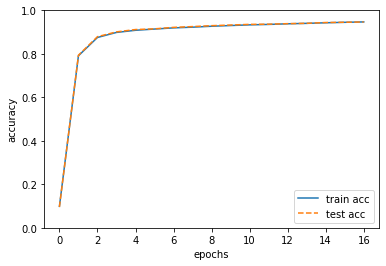

In [21]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()